<a href="https://colab.research.google.com/github/betelgeus/fundamentals_of_statistics_notes/blob/main/Stepik_fundamentals_of_statistics_notes_Part_2.ipynb" target="_parent">Colab</a>

# Основы статистики. Часть II

#### конспект лекций

Автор лекций: **Анатолий Карпов**





<hr>

## Содержание


### Часть 1 Анализ номинативных данных

 - [Расстояние Пирсона](#Расстояние-Пирсона)
 - [Распределение Хи-квадрат Пирсона](#Распределение-Хи-квадрат-Пирсона)
 - [Расчет p-уровня значимости](#Расчет-p-уровня-значимости)
 - [Анализ таблиц сопряженности](#Анализ-таблиц-сопряженности)
 - [Точный критерий Фишера](#Точный-критерий-Фишера)


### Часть 2 Логистическая регрессия и непараметрические методы

 - [Номинативная зависимая переменная](#Номинативная-зависимая-переменная)
 - [Модель без предикторов. Intercept only model](#Модель-без-предикторов.-Intercept-only-model)
 - [Модель с одним номинативным предиктором](#Модель-с-одним-номинативным-предиктором)
 - [Модель с двумя номинативными предикторами](#Модель-с-двумя-номинативными-предикторами)
 - [Взаимодействие номинативных предикторов](#Взаимодействие-номинативных-предикторов)
 - [Когда нужно использовать непараметрические методы и почему?](#Когда-нужно-использовать-непараметрические-методы-и-почему?)
 - [Непараметрические методы. Продолжение.](#Непараметрические-методы.-Продолжение.)

### Часть 3 Кластерный анализ и метод главных компонент

 - [Кластерный анализ методом **k-средних**](#Кластерный-анализ-методом-k-средних)
 - [Может ли кластерный анализ "ошибаться"?](#Может-ли-кластерный-анализ-ошибаться?)
 - [Как определить оптимальное число кластеров?](#Как-определить-оптимальное-число-кластеров?)
 - [**Иерархическая кластеризация**](#Иерархическая-кластеризация)
 - [Введение в метод анализа главных компонент](#Введение-в-метод-анализа-главных-компонент)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Часть 1 Анализ номинативных данных

## Расстояние Пирсона
<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-28%20в%2017.06.04.png" width="1000px"/>

### Пример
Предположим, что в результате подбрасывания монетки шанс получить решку и орла должен быть 50/50.

Сверим наше предположение с эмпирическими данными. Создадим генератор подбрасывания монетки, где 0 это орел, а 1 это решка.
1. Подбросим монетку 60 раз
2. Посмотрим, как результат отклонился от ожидаемого значение. Для этого воспользуемся формулой расчета расстояния Пирсона
3. Повторим эксперимент 10 000 раз
4. Посмотрим на распределение отклонения на гистограмме

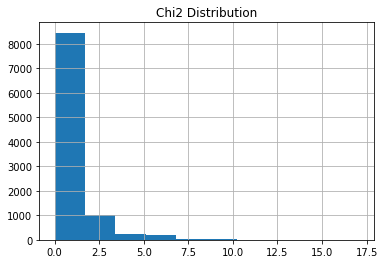

In [3]:
import random as random
import pandas as pd
import matplotlib.pyplot as plt

coin = []
trial = 60
expect = trial / 2
for _ in range(10000):
  coin.append(sum([random.randrange(0,  2) for _ in range(trial)]))
coin = pd.Series(coin)
chi2 = (coin - expect) ** 2 / expect +  ((trial - coin) - expect) ** 2 / expect
chi2.hist()
plt.title('Chi2 Distribution')
plt.show()

## Распределение Хи-квадрат Пирсона

Распределе́ние $ \chi^2 $ (хи-квадра́т) с $k$ степеня́ми свободы — это распределение суммы квадратов $k$ независимых **стандартных нормальных случайных величин**.


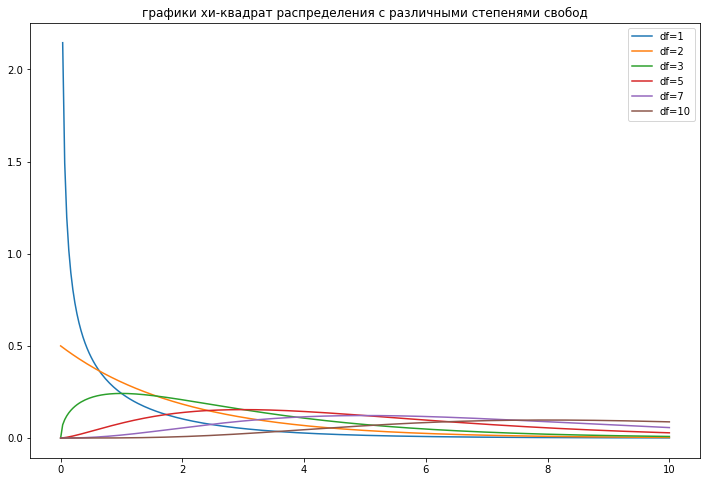

In [ ]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

x = np.linspace(0, 10, 300)
# степень свободы
df_set = {1, 2 , 3, 5, 7, 10}

for df in df_set:
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f'df={df}')

plt.title('графики хи-квадрат распределения с различными степенями свобод')
plt.legend()
plt.show()

## Расчет p-уровня значимости

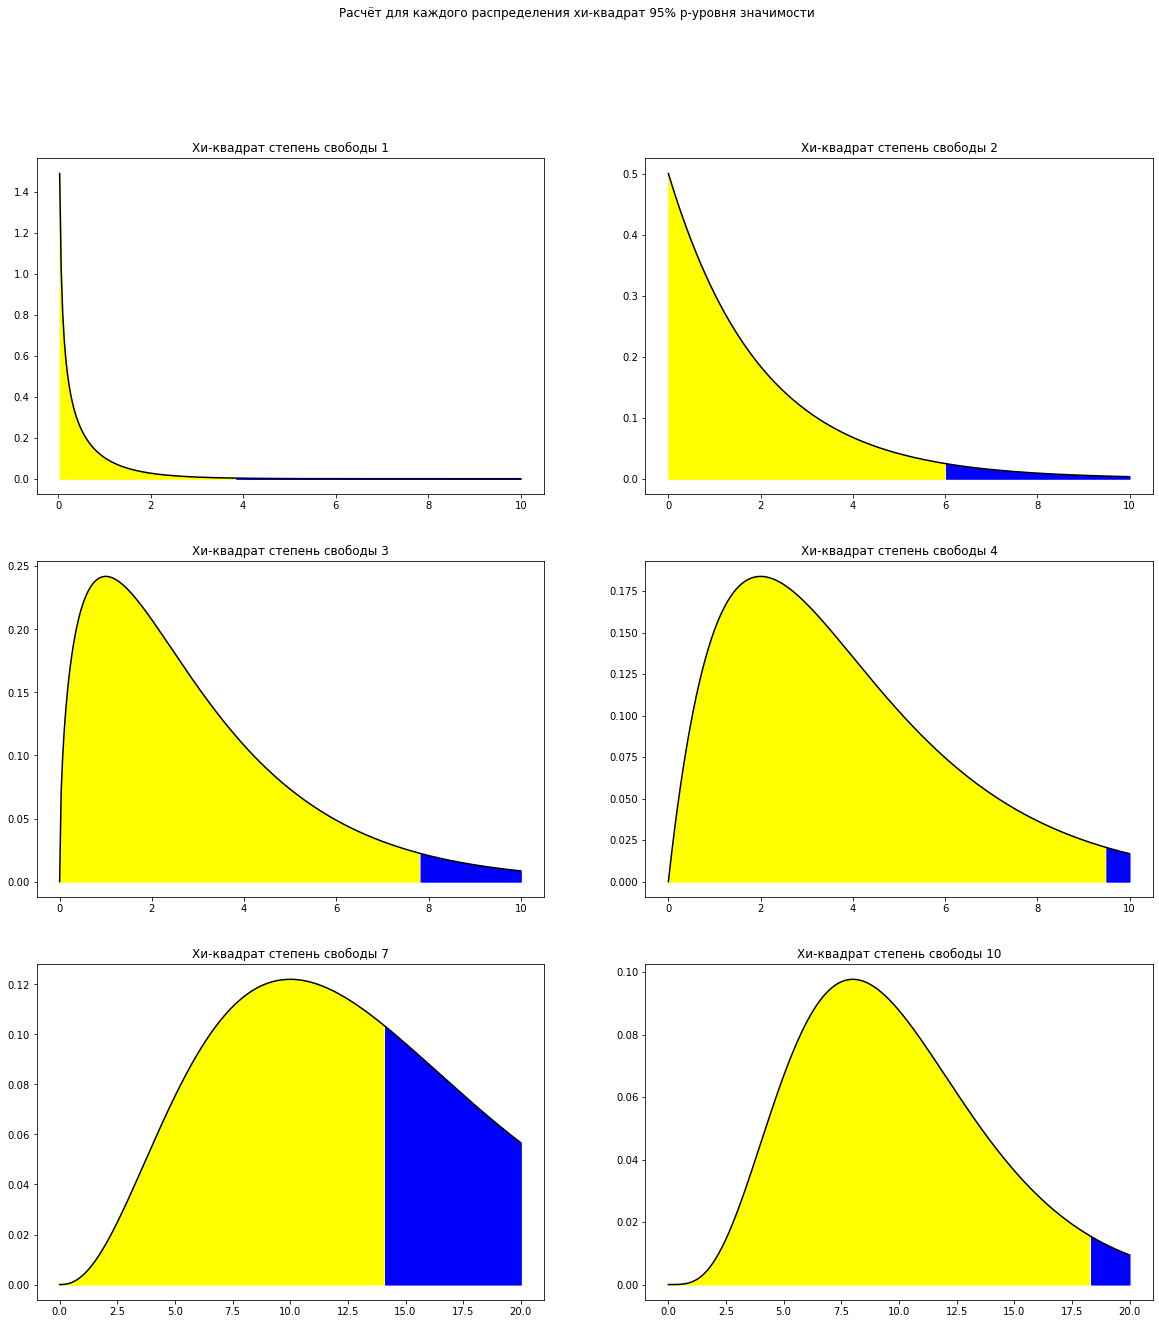

In [ ]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 21)

p = 0.95
x1 = np.linspace(0, 10, 300)
x2 = np.linspace(0, 20, 300)

fig, axs = plt.subplots(nrows=3, ncols=2)
axs =  axs.flat

for i, df in enumerate(df_set):
    chi_value = chi2.isf(1-p, df=df)
    y = chi2.pdf(x, df=df)
    x = x1 if df <= 4 else x2

    axs[i].set_title(f'Хи-квадрат степень свободы {df}')
    axs[i].plot(x, y, color='k')
    left_x, right_x = x <= chi_value, x >= chi_value
    axs[i].fill_between(x[left_x], y[left_x], color='yellow')
    axs[i].fill_between(x[right_x], y[right_x], color='blue')


fig.suptitle('Расчёт для каждого распределения хи-квадрат 95% p-уровня значимости')
plt.show()

### Примеры.1.4
Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [ ]:
from scipy.stats import chi2

# рассчитаем значение P value для Хи-квадрат равный 2
p_val_2 = 1 - chi2.cdf(2, df=2)
# рассчитаем значение P value для Хи-квадрат равный 4
p_val_4 = 1 - chi2.cdf(4, df=2)
# разница между 1 и 2 значением будет равна доле наблюдений
print(f'Доля наблюдений: {(p_val_2 - p_val_4)*100:.1f}%')

Доля наблюдений: 23.3%


In [ ]:
from scipy.stats import chi2

print(f'{chi2.cdf(4, df=2) - chi2.cdf(2, df=2):.4f}')

0.2325


Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 15

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся P-уровень значимости.

In [ ]:
from scipy.stats import chisquare


# Создадим два массива. Первый с эмпирическими данными, второй с ожидаемыми значениями
f_obs = [10, 10, 10, 5, 10, 15]
f_exp = [10, 10, 10, 10, 10, 10]
chi2, p_val = chisquare(f_obs, f_exp)
print('Chi-square:', chi2)
print('P-value:', round(p_val, 3))

Chi-square: 5.0
P-value: 0.416


In [ ]:
from scipy.stats import chi2
import numpy as np

observed = np.array([10, 10, 10, 5, 10, 15])

def chi_value(observed):
    # e - expected
    e = np.mean(observed)
    return sum([((o - e)**2)/e for o in observed])

p = chi2.sf(chi_value(observed), df=(observed.size-1))
print(f'{p:.4f}')

0.4159


Вернемся к нашему примеру с политическими партиями! Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий. Введите в поле для ответа получившееся значение статистики хи-квадрат с точностью хотя бы до одной цифры после запятой.

Партия А: 10 избирателей
Партия Б: 30 избирателей
Партия В: 50 избирателей

In [ ]:
from scipy.stats import chisquare

f_obs = [10, 30, 50]
chi2, _ = chisquare(f_obs)
print('Chi square:', round(chi2, 1))

Chi square: 26.7


Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости.

In [ ]:
from scipy.stats import chisquare

f_obs = [9, 15]
p_val = chisquare(f_obs)[1]
print('P-value:', round(p_val, 3))

P-value: 0.221


In [ ]:
from scipy.stats import chi2
import numpy as np

observed = np.array([15, 9])
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.2207


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [ ]:
from scipy.stats import chisquare

positive = 1500 * .53
negative = 1500 * .47
f_obs = [positive, negative]
p_val = chisquare(f_obs)[1]
if p_val < 0.05:
    print('Отвергаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.')
    print('P-value:', round(p_val, 4))
else:
    print('Принимаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.')
    print('P-value:', round(p_val, 4))

Отвергаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.
P-value: 0.0201


In [ ]:
n=1500
observed = np.array([0.53*n, 0.47*n], dtype='int32')
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.0201


## Анализ таблиц сопряженности
<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2013.11.02.png" width="600px"/>

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2013.11.16.png" width="600px"/>

## Примеры
В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.
<table>
<tr>
</td>
<td></td>
<td>1-ая грд. ф-ра. Y</td>
<td>2-ая грд. ф-ра. Y</td>
<td>Всего</td>
<tr>
<td>1-ая грд. ф-ра. X</td>
<td>10</td>
<td>6</td>
<td>16</td>
</td>
<tr>
<td>2-ая грд. ф-ра. X</td>
<td>5</td>
<td>15</td>
<td>20</td>
</td>
<tr>
<td>Всего</td>
<td>15</td>
<td>21</td>
<td></td>
</tr>
</table>
В поле для ответа напишите максимальное значение из четырех ожидаемых частот.

In [ ]:
import pandas as pd

In [ ]:
# Создадим таблицу
data_frame = pd.DataFrame([[10, 6], [5, 15]], index=['1-ая грд. ф-ра. X', '2-ая грд. ф-ра. X'], columns=['1-ая грд. ф-ра. Y', '2-ая грд. ф-ра. Y'])
print(data_frame)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y
1-ая грд. ф-ра. X                 10                  6
2-ая грд. ф-ра. X                  5                 15


In [ ]:
# Добавим в таблицу сумму по строкам
data_frame['Total'] = data_frame.sum(axis=1)
# Добавим в таблицу сумму по столбцам
data_frame.loc["Total"] = data_frame.sum()
print(data_frame)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y  Total
1-ая грд. ф-ра. X                 10                  6     16
2-ая грд. ф-ра. X                  5                 15     20
Total                             15                 21     36


In [ ]:
# Создадим пустую таблицу с ожидаемыми значениями. Еще можно так: np.zeros(np.shape(data_frame)), но не будет заголовков
data_frame_exp = pd.DataFrame([[0, 0], [0, 0]],  index=['1-ая грд. ф-ра. X', '2-ая грд. ф-ра. X'], columns=['1-ая грд. ф-ра. Y', '2-ая грд. ф-ра. Y'])
# 1-ым циклом переберем индексы колонок
# 2-ом циклом переберем индексы строк
# Для каждой ячейки в таблице с ожидаемыми значениями посчитаем значение по формуле сумма по признаку Y * сумма по признаку X / кол-во наблюдений
for i in range(len(data_frame) - 1):
    for j in range(len(data_frame) - 1):
        data_frame_exp.iat[i, j] = data_frame.loc['Total'][j] * data_frame.iloc[i]['Total'] / data_frame.loc['Total']['Total']
print(data_frame_exp)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y
1-ая грд. ф-ра. X           6.666667           9.333333
2-ая грд. ф-ра. X           8.333333          11.666667


In [ ]:
# Преобразуем таблицу в двумерный массив. Найдем в массиве максимальное число.
print(data_frame_exp.to_numpy().max())

11.666666666666666


In [ ]:
from scipy.stats import chi2_contingency


f_obs = [[10, 6], [5, 15]]
chi2, p_val, df, f_exp = chi2_contingency(f_obs)
print('chi2:', chi2)
print('p_val:', p_val)
print('df:', df)
print('f_exp:', f_exp)
print(f_exp.max())

chi2: 3.715714285714286
p_val: 0.053902557169387154
df: 1
f_exp: [[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]
11.666666666666666


**Важно!**

Обрати внимание, что степень свободы равна 1. Хотя у нас 4 группы, соответственно должна была быть равна 3.
Степень сводобы равна 1 потому, что зная всего 1 значение в ячейке и суммы по признакам X и Y мы можем рассчитать значения в остальных ячейках. Поэтому мы не можем сказать, что они независимы.

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2014.42.45.png" width="800px"/>







<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2015.51.55.png" width="800px"/>


#Пример

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2015.53.05.png" width="400px"/>




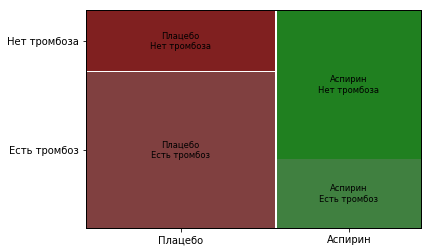

         Есть тромбоз  Нет тромбоза
Плацебо            18             7
Аспирин             6            13
           0          1
0  13.636364  10.363636
1  11.363636   8.636364


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

tab = pd.DataFrame({'Есть тромбоз': [18, 6], 'Нет тромбоза': [7, 13]}, index=('Плацебо', 'Аспирин'))
chi2, p_val, df, f_exp = chi2_contingency(tab.to_numpy())
mosaic(tab.stack())
plt.show()

print(tab)
print(pd.DataFrame(f_exp).T)

**Итого**
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке  (только для R).
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения (только для R).

## Точный критерий Фишера

**Важно!** Если хотя бы в одной ячейке ожидаемое явление меньше 5, то для анализа должен использоваться точный критерий Фишера!

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2017.09.10.png" width="800px"/>

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2017.08.08.png" width="1000px"/>

In [2]:
from scipy.stats import fisher_exact
f_obs = [[1, 3], [3, 1]]

# odds_ratio - отношение шансов
odds_ratio, p_val = fisher_exact(f_obs)
print('odds_ratio: ', odds_ratio)
print('p_val: ', p_val)

odds_ratio:  0.1111111111111111
p_val:  0.48571428571428565


# Практические задачи

Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций.

Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и
возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий
хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы, p-уровня значимости.

In [3]:
import pandas as pd
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency


def smart_test(data_frame):
    if data_frame.to_numpy().min() < 5:
        _, p_val = fisher_exact(data_frame)
        return p_val
    else:
        chi2, p_val, df, _ = chi2_contingency(data_frame)
        return chi2, df, p_val


table = pd.DataFrame({'1': [8, 2], '2':[6, 4]})
print(smart_test(table))

0.628482972136223


In [4]:
# Решение с расчетом точного критерия Фишера для таблиц более 2x2 (более двух градаций)
import numpy as np
from scipy.stats import chi2_contingency
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats = importr('stats')

ValueError: r_home is None. Try python -m rpy2.situation

In [ ]:
# Не забудь запустить предыдущую ячейку
data = np.array(np.random.randint(4,10,size=(2,5)))
print(data)


def smart_test (data):
    if data.min()<5:
        res = stats.fisher_test(data)
        return ('p-value: {}'.format(res[0][0]))
    else:
        kf, p_val, df, arr = chi2_contingency(data)
        return (kf, df, p_val)


print(smart_test(data))

Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — ﻿A, T, G и C.

Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность.

Cкачайте тестовый набор данных (смотри ниже), чтобы познакомиться с их структурой, на которых будет тестироваться ваша функция. Рассмотрим пример, всего-лишь с несколькими наблюдениями, чтобы прояснить суть задачи:

```
 V1 V2 V3
1  A  A  C
2  G  G  A
3  C  C  C
4  T  T  A
5  G  T  T
6  T  A  G
```
В этом примере три последовательности  V1 , V2, V3.
Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с ﻿названием переменной (или переменных), в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare

In [ ]:
data = pd.DataFrame([np.random.binomial(3, 0.5, np.random.randint(5, 15)) for _ in range(np.random.randint(2, 20))])
data.index = ['v' + str(i + 1) for i in range(len(data))]

p_val_result, number = 1, 0
for i in range(len(data)):
    p_val = chisquare(data.iloc[i])[1]
    if p_val < p_val_result:
        p_val_result = p_val
        number = i

print(p_val_result)
print(data.index[number])

In [ ]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data.csv')


def most_significant(data):
    p_val_res, name = 1, ''
    # enumerate позволяет получить индекс и значение элемента. Например, 0 и v1
    for _, col in enumerate(data.columns):
        # value_counts считаем количество значений, возвращает таблицу с названием значения и кол-вом.
        counts = data[col].value_counts()
        p_val = chisquare(counts)[1]
        if p_val < p_val_res:
            p_val_res = p_val
            name = col
    return (p_val_res, name)


print(most_significant(df))

In [ ]:
# Генератор
# random.choice случайным способом выбирает из значений 'A', 'T', 'G', 'C', size — количество элементов,
# p — вероятность того, что выпадет значение.
# for _ in range(np.random.randint(2, 20)) цикл создает последовательности в кол-ве от 2 до 20 в случайном порядке
df = pd.DataFrame([np.random.choice(['A', 'T', 'G', 'C'], size=np.random.randint(20, 50), p=[0.23, 0.27, 0.25, 0.25])
                   for _ in range(np.random.randint(2, 20))])
df.index = ['v' + str(i + 1) for i in range(len(df))]


def most_significant(data):
    p_val_res, name = 1, ''
    # iterrows позволяет получить название и значения строки в таблице.
    for row_name, row_data in df.iterrows():
        counts = data.loc[row_name].value_counts()
        p_val = chisquare(counts)[1]
        if p_val < p_val_res:
            p_val_res = p_val
            name = row_name
    return (p_val_res, name)


print(most_significant(df))

В лекциях я говорил, что иногда возникает необходимость перекодировать количественную переменную в номинативную. Однако зачастую мы можем создавать новую номинативную переменную, комбинируя значения нескольких количественных переменных.

Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

Формат ответа: в поле для ответа напишите скрипт, который создает новую переменную - фактор в данных iris.


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

table = pd.DataFrame(data=iris.data, columns=iris.feature_names)
important_cases = np.array([])
table.mean()

for _, row_data in table.iterrows():
    cnt = 0
    if row_data[0] > table.mean()[0]:
        cnt += 1
    if row_data[1] > table.mean()[1]:
        cnt += 1
    if row_data[2] > table.mean()[2]:
        cnt += 1
    if row_data[3] > table.mean()[3]:
        cnt += 1
    if cnt >= 3:
        important_cases = np.append(important_cases, 'Yes')
    else:
        important_cases = np.append(important_cases, 'No')


unique, counts = np.unique(important_cases, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['No' '81']
 ['Yes' '69']]


Обобщим предыдущую задачу! Напишем функцию get_important_cases, которая принимает на вход dataframe с произвольным числом количественных переменных (гарантируется хотя бы две переменные). Функция должна возвращать dataframe с новой переменной - фактором important_cases.

Переменная  important_cases принимает значение Yes, если для данного наблюдения больше половины количественных переменных имеют значения больше среднего. В противном случае переменная important_cases принимает значение No.

Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации.

In [7]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
table = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [8]:
def get_important_cases(df):
    # shape возвращает размер таблицы, кол-во строк, кол-во колонок. df.shape[1] вернет количество колонок
    half_var = df.shape[1] / 2
    # Функция создает таблицу comparisons. Логика работы:
    # Значения в таблице df построчно сравниваются со средним по колонке.
    # Если больше, то True, иначе False
    # sum суммирует кол-во True, сумма записывается в ячейку
    comparisons = (df > df.mean()).sum(axis=1)
    # Добавляем в таблицу колонку 'important_cases', заполняем по умолчанию No
    df['important_cases'] = 'No'
    # Построчно сравниваем кол-во в comparisons с кол-вом в half_var
    # Если больше, то в колонке "important_cases" проставляем значение "Yes"
    df.loc[comparisons > half_var, "important_cases"] = "Yes"
    return df


print(get_important_cases(table))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    important_cases  
0    

In [9]:
# Пошаговый пример. Отличие в промежуточной таблице comparisons
comparisons = (table > table.mean())
print(comparisons)
comparisons['sum'] = comparisons.sum(axis=1)
print(comparisons)

     important_cases  petal length (cm)  petal width (cm)  sepal length (cm)  \
0              False              False             False              False   
1              False              False             False              False   
2              False              False             False              False   
3              False              False             False              False   
4              False              False             False              False   
..               ...                ...               ...                ...   
145            False               True              True               True   
146            False               True              True               True   
147            False               True              True               True   
148            False               True              True               True   
149            False               True              True               True   

     sepal width (cm)  
0              

В R мы без труда можем рассчитать среднее и медиану вектора, а вот встроенной функции для расчета моды — наиболее часто встречаемого значения — в R нет! А мода так бы пригодилась нам при анализе номинативных данных! При этом функция mode в R существует, но выполняет абсолютно другую задачу (если хотите узнать, какую именно, ознакомьтесь со справкой: наберите в консоли ?mode).

Напишите функцию stat_mode, которая получает на вход вектор из чисел произвольной длины и возвращает числовой вектор с наиболее часто встречаемым значением. Если наиболее часто встречаемых значений несколько, функция должна возвращать несколько значений моды  в виде числового вектора.



In [10]:
import numpy as np
import pandas as pd

pd.DataFrame(np.array([1, 2, 2, 3, 4, 4, 4, 2])).mode()

,0
0,2
1,4


Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения.

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.